In [34]:
#import libraries and basic setup
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os

from time import time
from time import sleep

import seaborn as sns
import matplotlib.pyplot as plt

#sets up an API call to the CoinMarketCap API to retrieve the latest cryptocurrency market data. 



In [35]:
#create the automation function
def api_runner():
    
    #sets up the necessary parameters for the API call, convert currency to USD
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e1f75475-c5f8-4169-899b-fd78927ea3b5',
    }

    session = Session()
    session.headers.update(headers)

    #API response converted to a JSON format and stored in a data variable.
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #adds a timestamp column representing the current time
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now',utc=True)

    #checks whether a CSV file already exists on disk. 
    #If the file does not exist, it creates a new file and writes the header row. 
    #If the file does exist, it appends the new data to the existing file without writing the header row.
    if not os.path.isfile(r'C:\Users\lochr\Python\Python projects\API.csv'):
        df.to_csv(r'C:\Users\lochr\Python\Python projects\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\lochr\Python\Python projects\API.csv', mode = 'a', header = False)
        
        

In [45]:
#Calls the function 'api_runner' 333 times using a 'for' loop and sleeps for 5 minutes between each call.
for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(300) #sleep for 5 minute
exit()


API runner completed


KeyboardInterrupt: 

In [5]:
# Read the CSV file into a Pandas dataframe
df_check = pd.read_csv(r'C:\Users\lochr\Python\Python projects\API.csv')
#Formats the Pandas display options in the data frame to show 5 decimal places only
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_check


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10091,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19318268.00000,...,44.22640,520216762854.46002,NaN,2023-03-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 14:39:23.081127+00:00
1,1,1027,Ethereum,ETH,ethereum,6577,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,...,18.80530,203585216983.35001,NaN,2023-03-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 14:39:23.081127+00:00
2,2,825,Tether,USDT,tether,49430,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,73398710308.37930,...,6.79830,73337100092.57001,NaN,2023-03-15T14:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-15 14:39:23.081127+00:00
3,3,1839,BNB,BNB,bnb,1214,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157892039.24101,...,4.49920,49327724008.62000,NaN,2023-03-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 14:39:23.081127+00:00
4,4,3408,USD Coin,USDC,usd-coin,10738,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,38436998274.46083,...,3.54960,38408567423.42000,NaN,2023-03-15T14:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-15 14:39:23.081127+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,10,5426,Solana,SOL,solana,439,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,383225276.91247,...,0.68700,10222635391.24000,NaN,2023-03-15T18:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 18:09:44.589718+00:00
641,11,6636,Polkadot,DOT,polkadot-new,479,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1166453267.08907,...,0.64760,7594403463.65000,NaN,2023-03-15T18:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 18:09:44.589718+00:00
642,12,4943,Dai,DAI,multi-collateral-dai,1975,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,6006601448.73877,...,0.56670,5995957150.98000,NaN,2023-03-15T18:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2023-03-15 18:09:44.589718+00:00
643,13,1958,TRON,TRX,tron,737,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem']",NaN,91239700776.20757,...,0.55710,5894724126.62000,NaN,2023-03-15T18:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 18:09:44.589718+00:00


In [6]:
# Group data by cryptocurrency name and calculate mean of the % changes 
#for 1 hour, 24 hours, 7 days, 30 days, 60 days, and 90 days for each group.

df3 = df_check.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3.head()


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.71169,-5.62701,10.60429,13.21524,17.38161,40.04982
Ethereum,-0.78138,-7.23974,5.19884,10.58162,7.19691,28.74523
Tether,-0.03669,-0.10636,0.21627,0.10222,0.19830,0.20712
BNB,-0.52359,-3.78669,4.91474,6.30918,0.35695,16.06022
USD Coin,0.00761,0.05010,-0.07497,-0.06270,-0.08269,-0.07093


In [7]:
# stacks the data frame so that each % change and its value are in separate rows:
df4 = df3.stack()
#Converts  the data frame into a Pandas series:
df5 = df4.to_frame(name = 'values')

In [8]:
df5.count()

values    90
dtype: int64

In [9]:
#resets the index of the data frame and assigns the original index values to a new column "index":
index= pd.Index(range(90))
df6 = df5.reset_index()

In [10]:
# renames columns for easy interpretations
df7 = df6.rename(columns={'level_1':'percentage_change'})
df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1h','24h','7d', '30d', '60d','90d'])
df7

,name,percentage_change,values
0,Bitcoin,1h,-0.71169
1,Bitcoin,24h,-5.62701
2,Bitcoin,7d,10.60429
3,Bitcoin,30d,13.21524
4,Bitcoin,60d,17.38161
...,...,...,...
85,Shiba Inu,24h,-9.55395
86,Shiba Inu,7d,-8.02952
87,Shiba Inu,30d,-14.55302
88,Shiba Inu,60d,1.74350


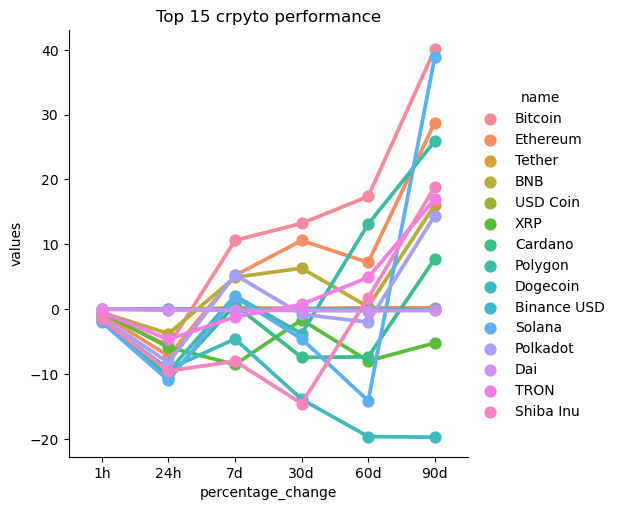

<Figure size 1600x900 with 0 Axes>

In [11]:
plot = sns.catplot(x='percentage_change', y='values', hue='name', data = df7, kind = 'point')
plt.title('Top 15 crpyto performance')
plt.figure(figsize=(16, 9))
plt.show()

In [18]:
def extract_cryptocurrency_data(name):
    df = df_check[['name', 'quote.USD.price', 'timestamp']]
    df = df.query(f'name == "{name}"')
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['timestamp'] = df['timestamp'].dt.strftime('%H:%M:%S')
    return df

In [42]:
dfbtc = extract_cryptocurrency_data('Bitcoin')
dfeth = extract_cryptocurrency_data('Ethereum')
dfusdt = extract_cryptocurrency_data('Tether')

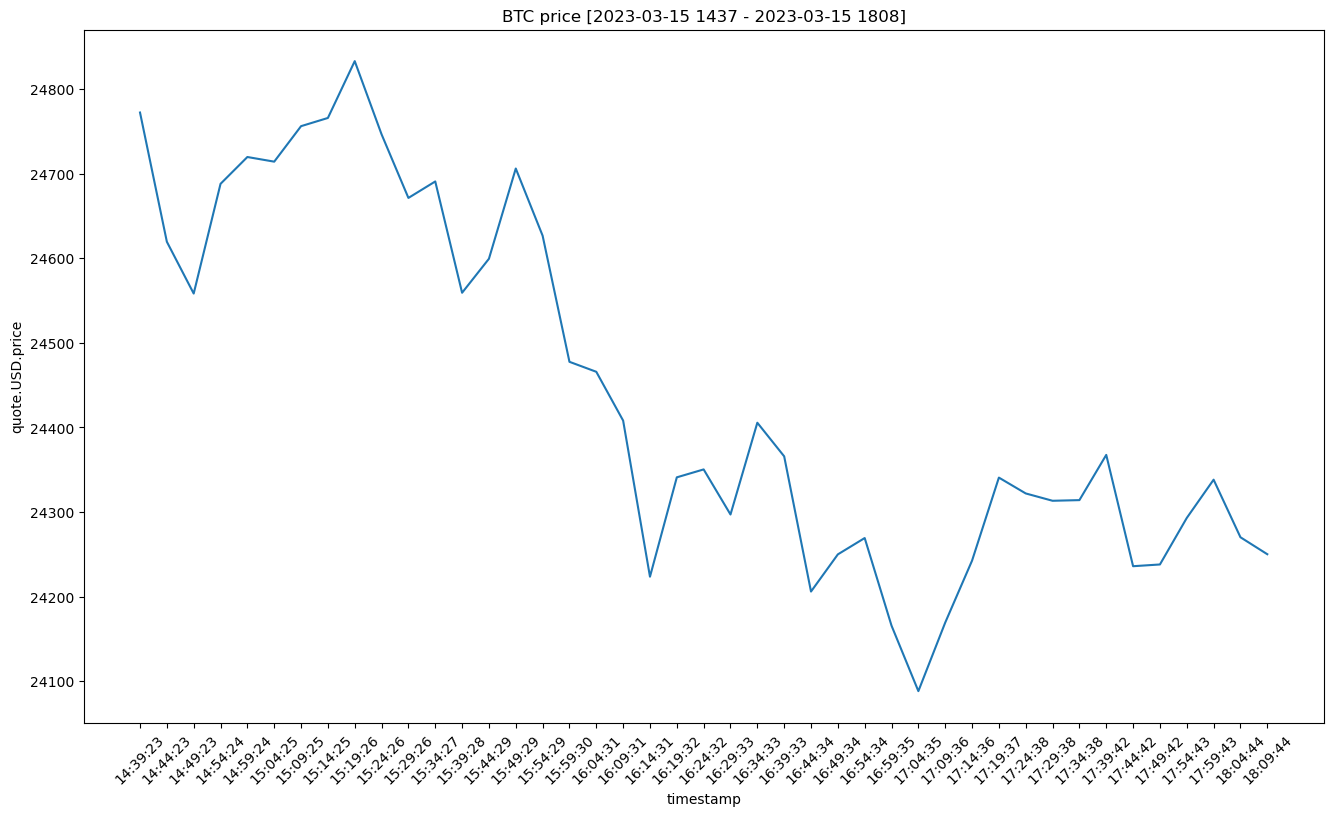

In [37]:
plt.figure(figsize=(16, 9))
sns.lineplot(x='timestamp', y='quote.USD.price', data=dfbtc)
plt.title('BTC price [2023-03-15 1437 - 1808]')
plt.xticks(rotation=45)
plt.show()

Finding the max and min of BTC price

In [44]:
df_btc = df_check[df_check['name'] == 'Bitcoin']
max_price_btc = df_btc['quote.USD.price'].max()
print("The maximum price for Bitcoin is: {:.3f}".format(max_price_btc))


The maximum price for Bitcoin is: 24832.986


In [43]:
df_btc = df_check[df_check['name'] == 'Bitcoin']
min_price_btc = df_btc['quote.USD.price'].min()
print("The minimum price for Bitcoin is: {:.3f}".format(min_price_btc))


The minimum price for Bitcoin is: 24088.178
